# 01 - Exploration des Données (EDA)

**Objectif**: Comprendre la distribution et les caractéristiques du dataset de prédiction de victoire Pokémon Let's Go.

**Dataset**: `matchups_{scenario}.parquet` généré par `build_battle_winner_dataset_v2.py`

**Date**: 2026-01-24

---

## Table des Matières

1. [Chargement des Données](#1-chargement-des-données)
2. [Aperçu du Dataset](#2-aperçu-du-dataset)
3. [Analyse par Scénario](#3-analyse-par-scénario-v2-uniquement)
4. [Analyse de la Variable Cible](#4-analyse-de-la-variable-cible)
5. [Distribution des Stats Pokémon](#5-distribution-des-stats-pokémon)
6. [Analyse des Types](#6-analyse-des-types)
7. [Analyse des Moves](#7-analyse-des-moves)
8. [Corrélations](#8-corrélations)
9. [Analyse des Features Dérivées](#9-analyse-des-features-dérivées)
10. [Conclusions](#10-conclusions)

## 1. Chargement des Données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Chemins - Dataset v2 (multi-scénarios)
BASE_DIR = Path('../data/ml/battle_winner_v2')
RAW_DIR = BASE_DIR / 'raw'
PROCESSED_DIR = BASE_DIR / 'processed'

print(f"✅ Bibliothèques chargées")
print(f"✅ Répertoire: {BASE_DIR}")

✅ Bibliothèques chargées
✅ Répertoire: ../data/ml/battle_winner_v2


In [2]:
# Chargement des datasets
df_train = pd.read_parquet(PROCESSED_DIR / 'train.parquet')
df_test = pd.read_parquet(PROCESSED_DIR / 'test.parquet')

# Pour df_raw, charger le scénario best_move comme représentatif
if (RAW_DIR / 'matchups_best_move.parquet').exists():
    df_raw = pd.read_parquet(RAW_DIR / 'matchups_best_move.parquet')
    print(f"✅ Dataset brut chargé (best_move): {df_raw.shape}")
else:
    # Fallback: combiner train + test
    df_raw = pd.concat([df_train, df_test], ignore_index=True)
    print(f"✅ Dataset brut chargé (train+test combinés): {df_raw.shape}")

print(f"✅ Train set chargé: {df_train.shape}")
print(f"✅ Test set chargé: {df_test.shape}")

✅ Dataset brut chargé (best_move): (34782, 39)
✅ Train set chargé: (718889, 39)
✅ Test set chargé: (179723, 39)


## 2. Aperçu du Dataset

In [3]:
# Informations générales
print("=" * 80)
print("📊 INFORMATIONS GÉNÉRALES")
print("=" * 80)
df_raw.info()

📊 INFORMATIONS GÉNÉRALES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34782 entries, 0 to 34781
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   scenario_type     34782 non-null  object 
 1   pokemon_a_id      34782 non-null  int64  
 2   pokemon_b_id      34782 non-null  int64  
 3   pokemon_a_name    34782 non-null  object 
 4   pokemon_b_name    34782 non-null  object 
 5   a_hp              34782 non-null  int64  
 6   a_attack          34782 non-null  int64  
 7   a_defense         34782 non-null  int64  
 8   a_sp_attack       34782 non-null  int64  
 9   a_sp_defense      34782 non-null  int64  
 10  a_speed           34782 non-null  int64  
 11  a_type_1          34782 non-null  object 
 12  a_type_2          34782 non-null  object 
 13  b_hp              34782 non-null  int64  
 14  b_attack          34782 non-null  int64  
 15  b_defense         34782 non-null  int64  
 16  b_sp_attack    

In [4]:
# Premières lignes
print("\n" + "=" * 80)
print("👀 PREMIÈRES LIGNES")
print("=" * 80)
df_raw.head(10)


👀 PREMIÈRES LIGNES


,scenario_type,pokemon_a_id,pokemon_b_id,pokemon_a_name,pokemon_b_name,a_hp,a_attack,a_defense,a_sp_attack,a_sp_defense,a_speed,a_type_1,a_type_2,b_hp,b_attack,b_defense,b_sp_attack,b_sp_defense,b_speed,b_type_1,b_type_2,a_move_name,a_move_power,a_move_type,a_move_priority,a_move_stab,a_move_type_mult,b_move_name,b_move_power,b_move_type,b_move_priority,b_move_stab,b_move_type_mult,speed_diff,hp_diff,a_total_stats,b_total_stats,a_moves_first,winner
0,best_move,1,2,Bulbasaur,Ivysaur,45,49,49,65,65,45,Plante,Poison,60,62,63,80,80,60,Plante,Poison,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Bomb-Beurk,90.0,Poison,0,1.5,1.0,-15,-15,318,405,0,0
1,best_move,1,3,Bulbasaur,Venusaur,45,49,49,65,65,45,Plante,Poison,80,82,83,100,100,80,Plante,Poison,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Bomb-Beurk,90.0,Poison,0,1.5,1.0,-35,-35,318,525,0,0
2,best_move,1,4,Bulbasaur,Charmander,45,49,49,65,65,45,Plante,Poison,39,52,43,60,50,65,Feu,none,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Déflagration,110.0,Feu,0,1.5,2.0,-20,6,318,309,0,0
3,best_move,1,5,Bulbasaur,Charmeleon,45,49,49,65,65,45,Plante,Poison,58,64,58,80,65,80,Feu,none,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Déflagration,110.0,Feu,0,1.5,2.0,-35,-13,318,405,0,0
4,best_move,1,6,Bulbasaur,Charizard,45,49,49,65,65,45,Plante,Poison,78,84,78,109,85,100,Feu,Vol,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Boutefeu,120.0,Feu,0,1.5,2.0,-55,-33,318,534,0,0
5,best_move,1,7,Bulbasaur,Squirtle,45,49,49,65,65,45,Plante,Poison,44,48,65,50,64,43,Eau,none,Lance-Soleil,100.0,Plante,0,1.5,2.0,Laser Glace,90.0,Glace,0,1.0,2.0,2,1,318,314,1,1
6,best_move,1,8,Bulbasaur,Wartortle,45,49,49,65,65,45,Plante,Poison,59,63,80,65,80,58,Eau,none,Lance-Soleil,100.0,Plante,0,1.5,2.0,Laser Glace,90.0,Glace,0,1.0,2.0,-13,-14,318,405,0,1
7,best_move,1,9,Bulbasaur,Blastoise,45,49,49,65,65,45,Plante,Poison,79,83,100,85,105,78,Eau,none,Lance-Soleil,100.0,Plante,0,1.5,2.0,Laser Glace,90.0,Glace,0,1.0,2.0,-33,-34,318,530,0,0
8,best_move,1,10,Bulbasaur,Caterpie,45,49,49,65,65,45,Plante,Poison,45,30,35,20,20,45,Insecte,none,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Charge,40.0,Normal,0,1.0,1.0,0,0,318,195,1,1
9,best_move,1,11,Bulbasaur,Metapod,45,49,49,65,65,45,Plante,Poison,50,20,55,25,25,30,Insecte,none,Bomb-Beurk,90.0,Poison,0,1.5,1.0,Charge,40.0,Normal,0,1.0,1.0,15,-5,318,205,1,1


In [5]:
# Statistiques descriptives
print("\n" + "=" * 80)
print("📈 STATISTIQUES DESCRIPTIVES")
print("=" * 80)
df_raw.describe()


📈 STATISTIQUES DESCRIPTIVES


,pokemon_a_id,pokemon_b_id,a_hp,a_attack,a_defense,a_sp_attack,a_sp_defense,a_speed,b_hp,b_attack,b_defense,b_sp_attack,b_sp_defense,b_speed,a_move_power,a_move_priority,a_move_stab,a_move_type_mult,b_move_power,b_move_priority,b_move_stab,b_move_type_mult,speed_diff,hp_diff,a_total_stats,b_total_stats,a_moves_first,winner
count,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000,34782.000000
mean,94.299465,94.299465,65.427807,77.550802,71.513369,70.026738,68.534759,72.149733,65.427807,77.550802,71.513369,70.026738,68.534759,72.149733,103.964551,0.045685,1.232160,1.762607,103.964551,0.045685,1.232160,1.762607,0.000000,0.000000,425.203209,425.203209,0.515439,0.500086
std,54.346340,54.346340,28.033403,30.125863,29.028222,33.883335,25.089776,30.059181,28.033403,30.125863,29.028222,33.883335,25.089776,30.059181,42.345800,0.279053,0.249366,0.836894,42.345800,0.279053,0.249366,0.836894,42.624223,39.751648,113.581172,113.581172,0.499769,0.500007
min,1.000000,1.000000,10.000000,5.000000,5.000000,10.000000,20.000000,15.000000,10.000000,5.000000,5.000000,10.000000,20.000000,15.000000,15.000000,0.000000,1.000000,0.000000,15.000000,0.000000,1.000000,0.000000,-135.000000,-240.000000,195.000000,195.000000,0.000000,0.000000
25%,47.000000,47.000000,45.000000,55.000000,50.000000,45.000000,50.000000,45.000000,45.000000,55.000000,50.000000,45.000000,50.000000,45.000000,80.000000,0.000000,1.000000,1.000000,80.000000,0.000000,1.000000,1.000000,-30.000000,-24.000000,323.000000,323.000000,0.000000,0.000000
50%,94.000000,94.000000,61.000000,75.000000,69.000000,65.000000,70.000000,70.000000,61.000000,75.000000,69.000000,65.000000,70.000000,70.000000,90.000000,0.000000,1.000000,2.000000,90.000000,0.000000,1.000000,2.000000,0.000000,0.000000,435.000000,435.000000,1.000000,1.000000
75%,142.000000,142.000000,80.000000,95.000000,90.000000,90.000000,85.000000,93.000000,80.000000,95.000000,90.000000,90.000000,85.000000,93.000000,110.000000,0.000000,1.500000,2.000000,110.000000,0.000000,1.500000,2.000000,30.000000,24.000000,500.000000,500.000000,1.000000,1.000000
max,188.000000,188.000000,250.000000,190.000000,180.000000,194.000000,130.000000,150.000000,250.000000,190.000000,180.000000,194.000000,130.000000,150.000000,250.000000,2.000000,1.500000,4.000000,250.000000,2.000000,1.500000,4.000000,135.000000,240.000000,780.000000,780.000000,1.000000,1.000000


In [6]:
# Colonnes et types
print("\n" + "=" * 80)
print("🔍 COLONNES ET TYPES")
print("=" * 80)
for col in df_raw.columns:
    print(f"{col:30s} | {str(df_raw[col].dtype):15s} | Null: {df_raw[col].isna().sum():6d}")


🔍 COLONNES ET TYPES
scenario_type                  | object          | Null:      0
pokemon_a_id                   | int64           | Null:      0
pokemon_b_id                   | int64           | Null:      0
pokemon_a_name                 | object          | Null:      0
pokemon_b_name                 | object          | Null:      0
a_hp                           | int64           | Null:      0
a_attack                       | int64           | Null:      0
a_defense                      | int64           | Null:      0
a_sp_attack                    | int64           | Null:      0
a_sp_defense                   | int64           | Null:      0
a_speed                        | int64           | Null:      0
a_type_1                       | object          | Null:      0
a_type_2                       | object          | Null:      0
b_hp                           | int64           | Null:      0
b_attack                       | int64           | Null:      0
b_defense          

## 3. Analyse par Scénario

In [7]:
if 'scenario_type' in df_raw.columns:
    print("=" * 80)
    print("📊 DISTRIBUTION DES SCÉNARIOS")
    print("=" * 80)
    
    # Comptage par scénario
    scenario_counts = df_raw['scenario_type'].value_counts()
    scenario_pct = df_raw['scenario_type'].value_counts(normalize=True) * 100
    
    scenario_df = pd.DataFrame({
        'Count': scenario_counts,
        'Percentage': scenario_pct
    })
    print(scenario_df)
    print(f"\n✅ Total échantillons: {len(df_raw):,}")
    print(f"✅ Nombre de scénarios: {df_raw['scenario_type'].nunique()}")
else:
    print("⚠️ Colonne scenario_type non trouvée dans le dataset")

📊 DISTRIBUTION DES SCÉNARIOS
               Count  Percentage
scenario_type                   
best_move      34782       100.0

✅ Total échantillons: 34,782
✅ Nombre de scénarios: 1


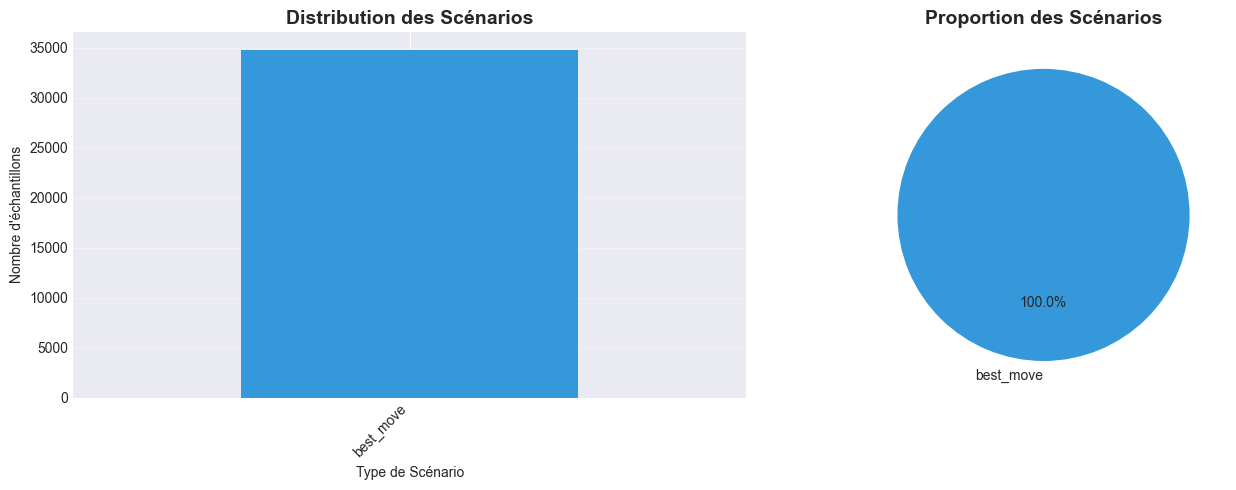

In [8]:
if 'scenario_type' in df_raw.columns:
    # Visualisation de la distribution des scénarios
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot
    scenario_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c', '#f39c12'])
    axes[0].set_title('Distribution des Scénarios', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Type de Scénario')
    axes[0].set_ylabel("Nombre d'échantillons")
    axes[0].set_xticklabels(scenario_counts.index, rotation=45, ha='right')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Pie chart
    axes[1].pie(scenario_counts, labels=scenario_counts.index, autopct='%1.1f%%',
                colors=['#3498db', '#e74c3c', '#f39c12'], startangle=90)
    axes[1].set_title('Proportion des Scénarios', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


🏆 TAUX DE VICTOIRE PAR SCÉNARIO
               Total Matchups  Wins A  Wins B  Win Rate A  Win Rate B
scenario_type                                                        
best_move               34782   17394   17388         0.5         0.5


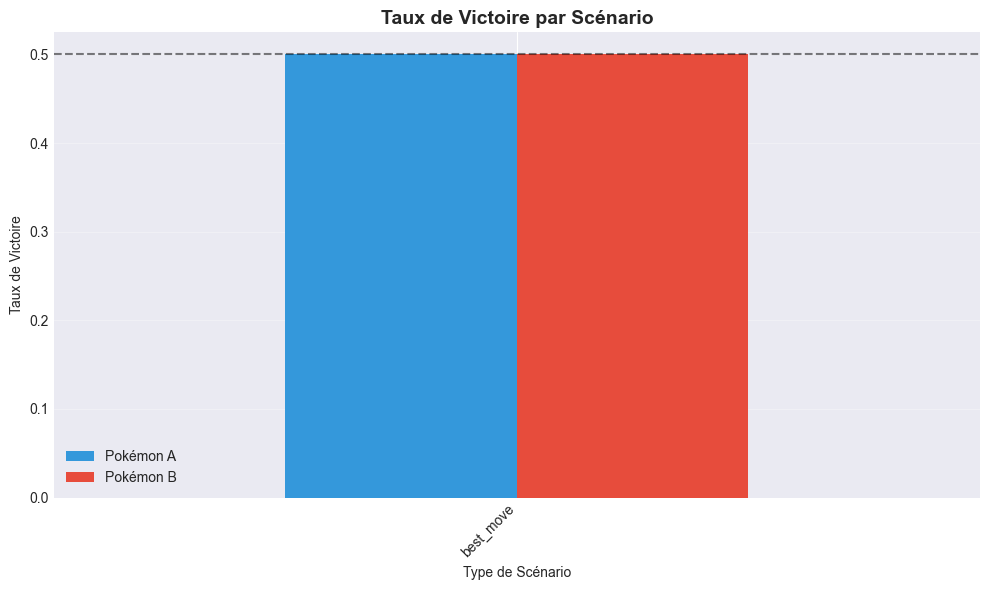

In [9]:
if 'scenario_type' in df_raw.columns:
    # Analyse du taux de victoire par scénario
    print("\n" + "=" * 80)
    print("🏆 TAUX DE VICTOIRE PAR SCÉNARIO")
    print("=" * 80)
    
    win_rate_by_scenario = df_raw.groupby('scenario_type').agg({
        'winner': ['count', lambda x: (x == 0).sum(), lambda x: (x == 1).sum(), 'mean']
    }).round(3)
    win_rate_by_scenario.columns = ['Total Matchups', 'Wins B', 'Wins A', 'Win Rate A']
    win_rate_by_scenario['Win Rate B'] = 1 - win_rate_by_scenario['Win Rate A']
    win_rate_by_scenario = win_rate_by_scenario[['Total Matchups', 'Wins A', 'Wins B', 'Win Rate A', 'Win Rate B']]
    print(win_rate_by_scenario)
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(10, 6))
    win_rate_by_scenario[['Win Rate A', 'Win Rate B']].plot(kind='bar', ax=ax, color=['#3498db', '#e74c3c'])
    ax.set_title('Taux de Victoire par Scénario', fontsize=14, fontweight='bold')
    ax.set_xlabel('Type de Scénario')
    ax.set_ylabel('Taux de Victoire')
    ax.set_xticklabels(win_rate_by_scenario.index, rotation=45, ha='right')
    ax.legend(['Pokémon A', 'Pokémon B'])
    ax.axhline(y=0.5, color='black', linestyle='--', alpha=0.5, label='Équilibre 50/50')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


📊 DISTRIBUTION DES STATS PAR SCÉNARIO


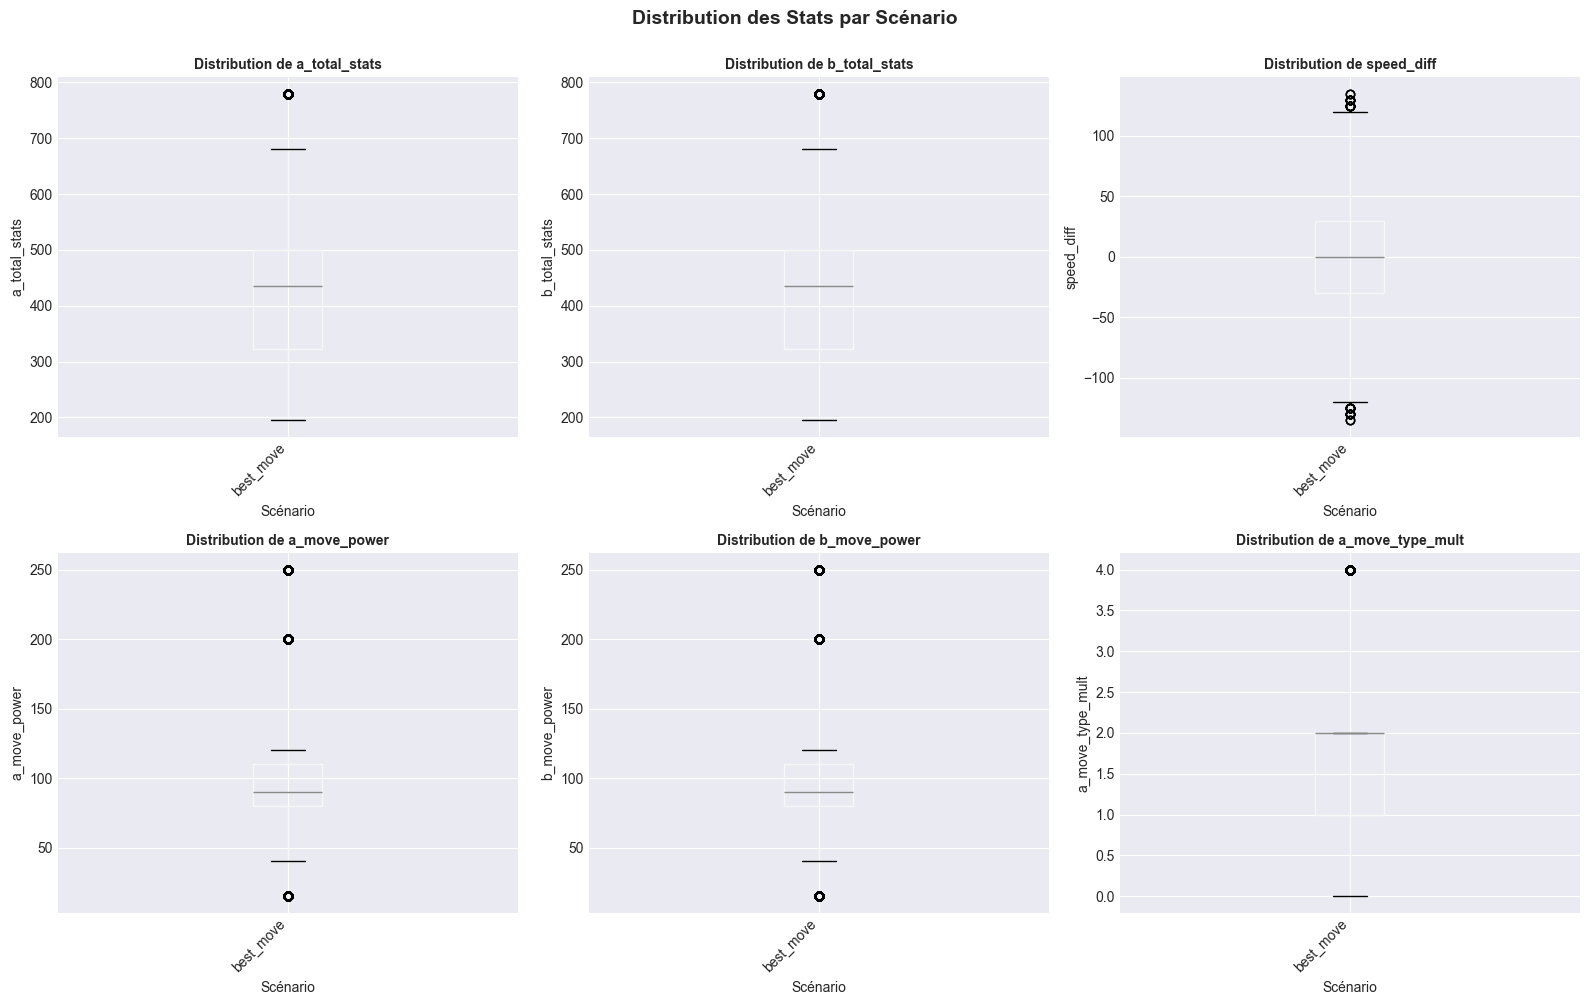

In [10]:
if 'scenario_type' in df_raw.columns:
    # Boxplot des stats par scénario
    print("\n" + "=" * 80)
    print("📊 DISTRIBUTION DES STATS PAR SCÉNARIO")
    print("=" * 80)
    
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    stat_cols = ['a_total_stats', 'b_total_stats', 'speed_diff', 
                 'a_move_power', 'b_move_power', 'a_move_type_mult']
    
    for i, col in enumerate(stat_cols):
        if col in df_raw.columns:
            df_raw.boxplot(column=col, by='scenario_type', ax=axes[i])
            axes[i].set_title(f'Distribution de {col}', fontsize=10, fontweight='bold')
            axes[i].set_xlabel('Scénario')
            axes[i].set_ylabel(col)
            plt.sca(axes[i])
            plt.xticks(rotation=45, ha='right')
    
    plt.suptitle('Distribution des Stats par Scénario', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()


🔥 HEATMAP: FEATURES CLÉS PAR SCÉNARIO


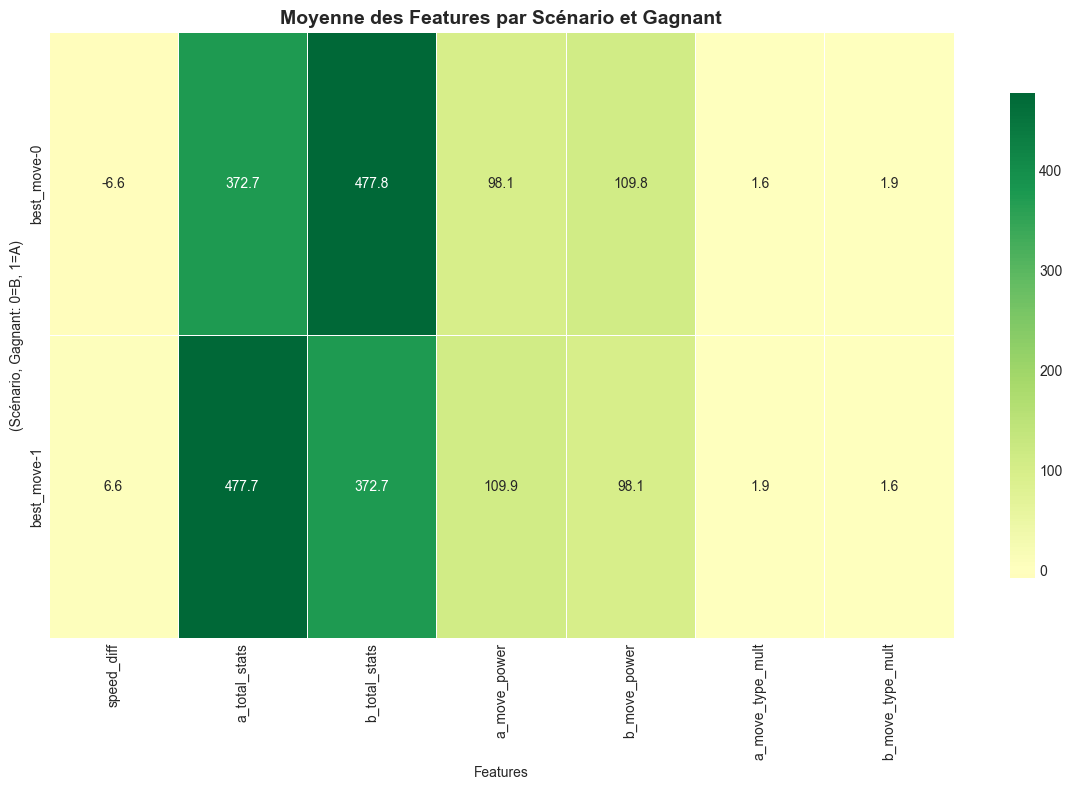

In [11]:
if 'scenario_type' in df_raw.columns:
    # Heatmap du taux de victoire par scénario et statistiques clés
    print("\n" + "=" * 80)
    print("🔥 HEATMAP: FEATURES CLÉS PAR SCÉNARIO")
    print("=" * 80)
    
    # Calculer la moyenne de plusieurs features par scénario et gagnant
    feature_cols = ['speed_diff', 'a_total_stats', 'b_total_stats', 
                    'a_move_power', 'b_move_power', 'a_move_type_mult', 'b_move_type_mult']
    feature_cols = [col for col in feature_cols if col in df_raw.columns]
    
    pivot_data = df_raw.groupby(['scenario_type', 'winner'])[feature_cols].mean()
    
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='RdYlGn', center=0, 
                linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
    ax.set_title('Moyenne des Features par Scénario et Gagnant', fontsize=14, fontweight='bold')
    ax.set_xlabel('Features')
    ax.set_ylabel('(Scénario, Gagnant: 0=B, 1=A)')
    plt.tight_layout()
    plt.show()

## 4. Analyse de la Variable Cible

In [12]:
# Distribution de la cible
print("=" * 80)
print("🎯 DISTRIBUTION DE LA VARIABLE CIBLE: winner")
print("=" * 80)

target_counts = df_raw['winner'].value_counts().sort_index()
target_pct = df_raw['winner'].value_counts(normalize=True).sort_index() * 100

result = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_pct
})
result.index = ['Pokémon B gagne (0)', 'Pokémon A gagne (1)']
print(result)
print(f"\n✅ Balance des classes: {min(target_pct):.1f}% / {max(target_pct):.1f}%")

🎯 DISTRIBUTION DE LA VARIABLE CIBLE: winner
                     Count  Percentage
Pokémon B gagne (0)  17388   49.991375
Pokémon A gagne (1)  17394   50.008625

✅ Balance des classes: 50.0% / 50.0%


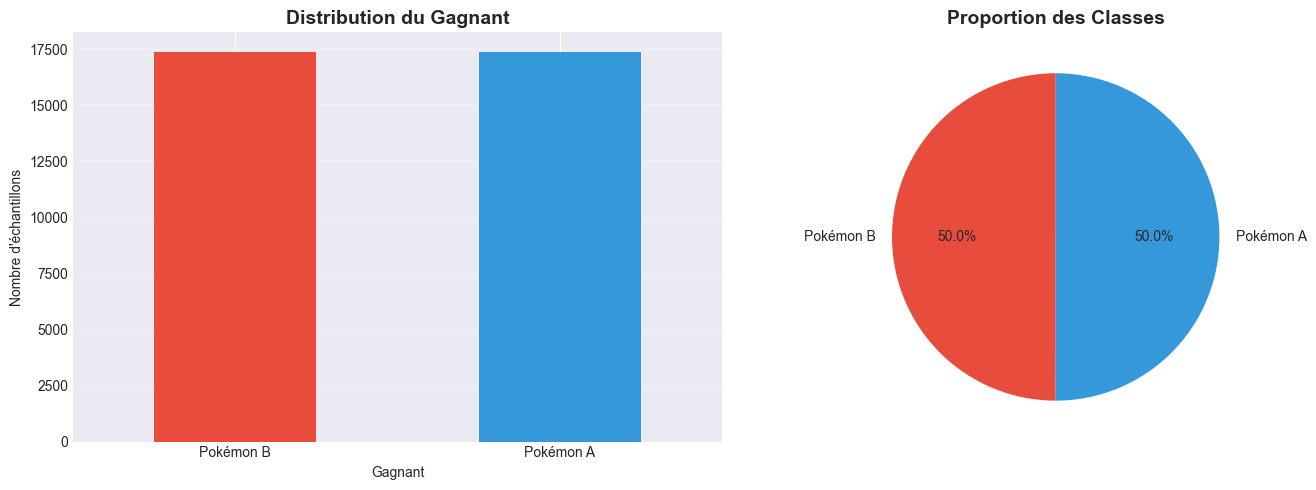

In [13]:
# Visualisation de la cible
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#3498db'])
axes[0].set_title('Distribution du Gagnant', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gagnant')
axes[0].set_ylabel("Nombre d'échantillons")
axes[0].set_xticklabels(['Pokémon B', 'Pokémon A'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(target_counts, labels=['Pokémon B', 'Pokémon A'], autopct='%1.1f%%',
            colors=['#e74c3c', '#3498db'], startangle=90)
axes[1].set_title('Proportion des Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Distribution des Stats Pokémon

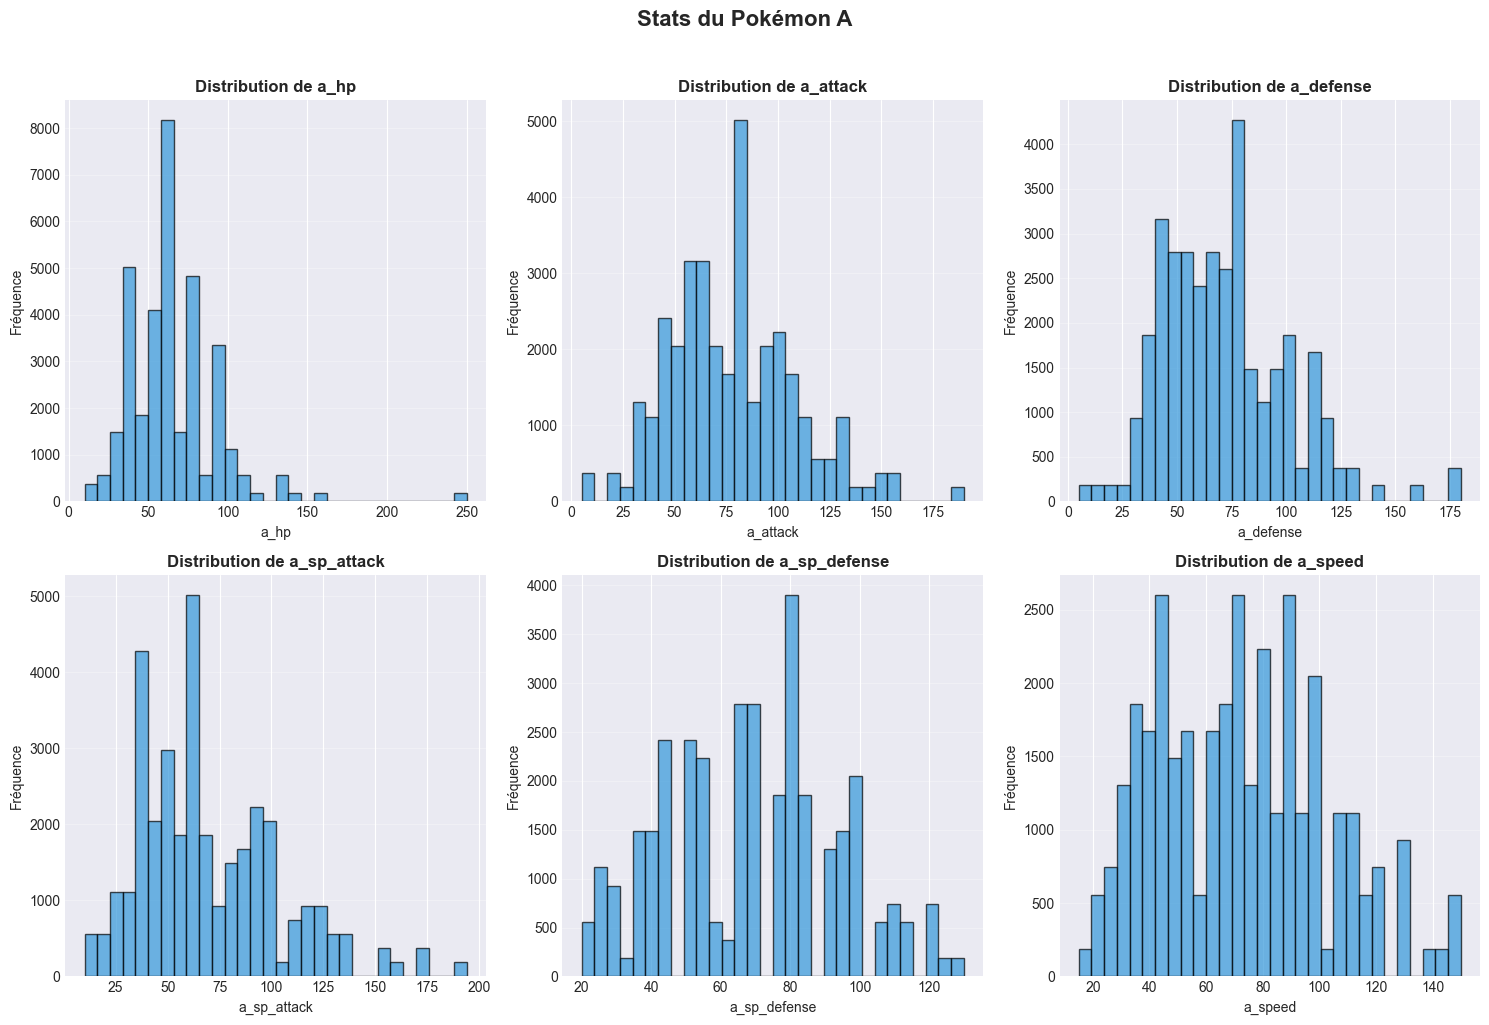

In [14]:
# Distribution des stats du Pokémon A
stat_cols_a = ['a_hp', 'a_attack', 'a_defense', 'a_sp_attack', 'a_sp_defense', 'a_speed']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(stat_cols_a):
    df_raw[col].plot(kind='hist', bins=30, ax=axes[i], color='#3498db', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Stats du Pokémon A', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

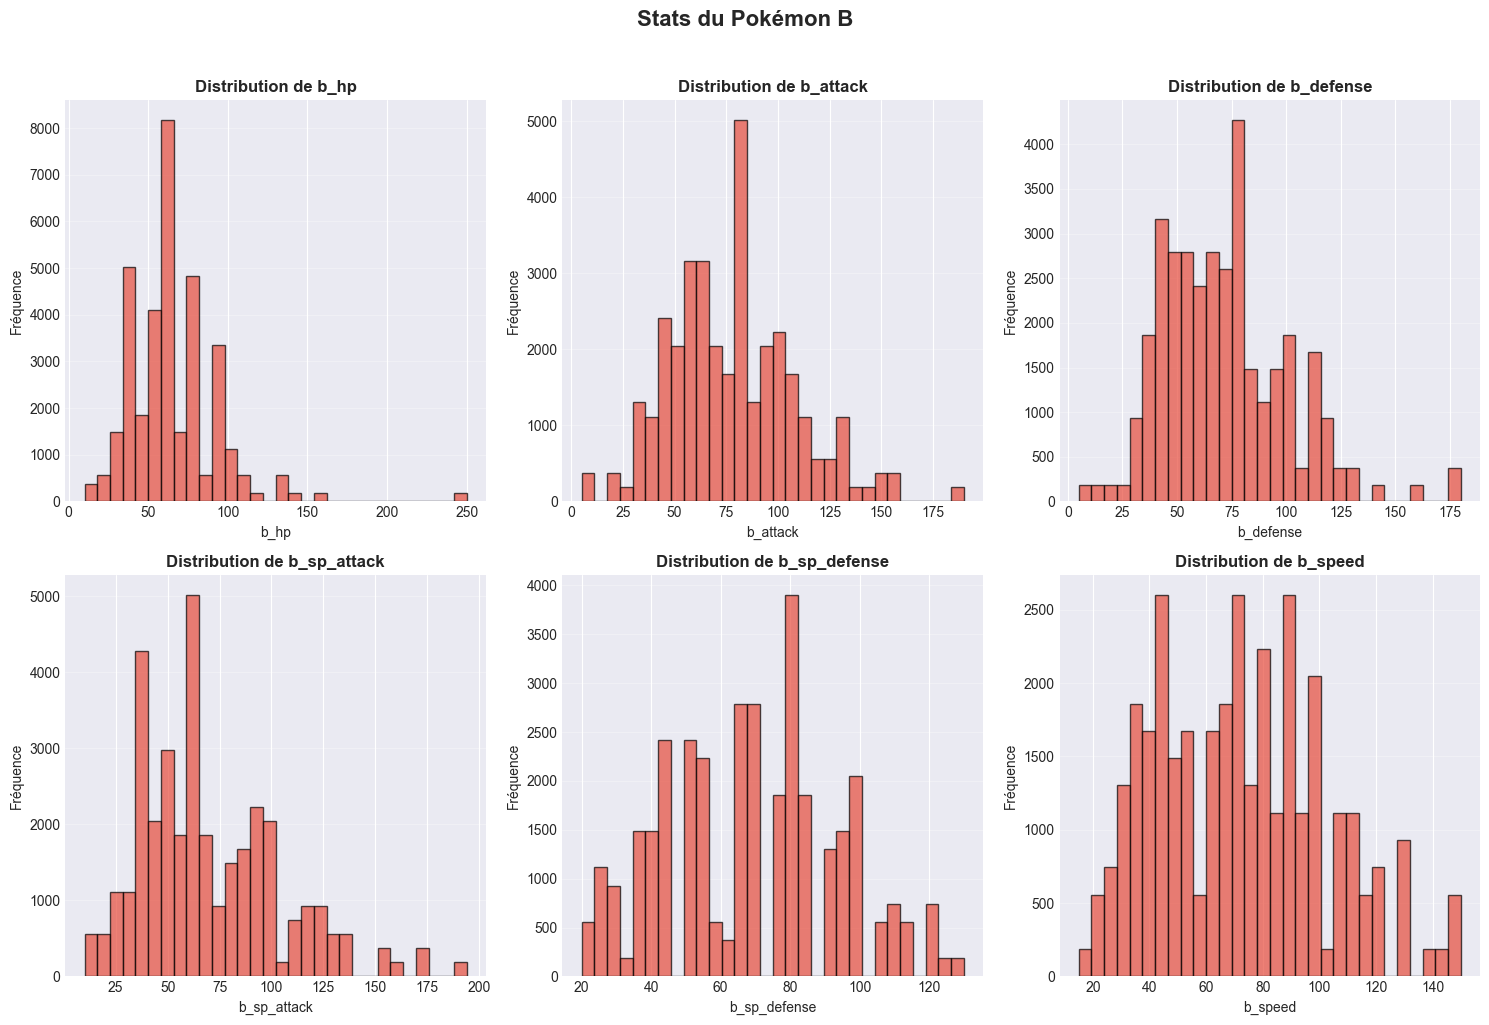

In [15]:
# Distribution des stats du Pokémon B
stat_cols_b = ['b_hp', 'b_attack', 'b_defense', 'b_sp_attack', 'b_sp_defense', 'b_speed']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(stat_cols_b):
    df_raw[col].plot(kind='hist', bins=30, ax=axes[i], color='#e74c3c', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution de {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Stats du Pokémon B', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

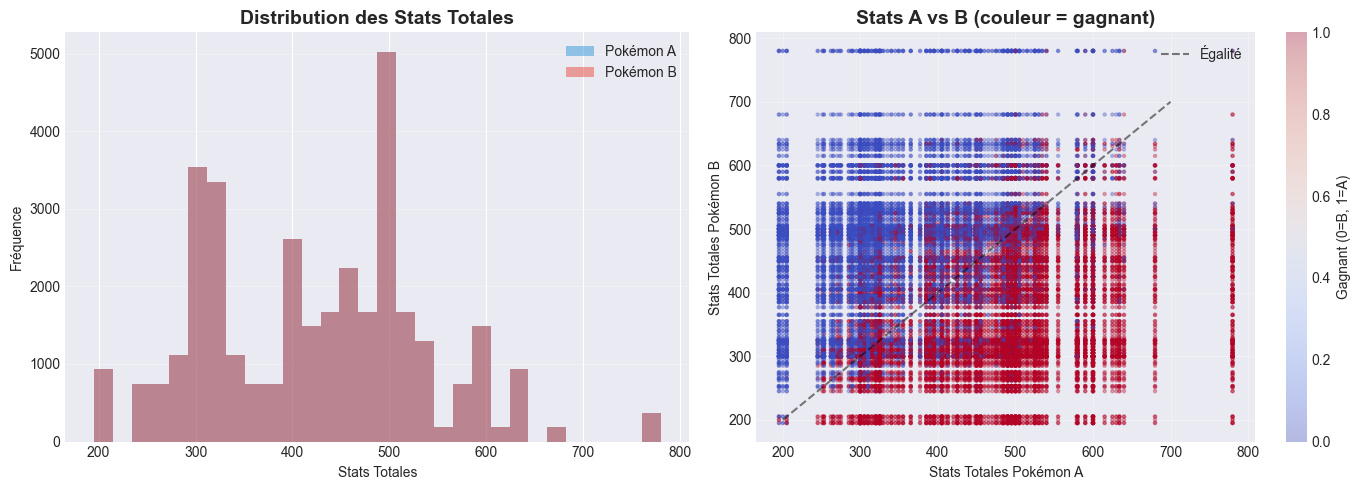

In [16]:
# Comparaison des stats totales
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution a_total_stats vs b_total_stats
axes[0].hist(df_raw['a_total_stats'], bins=30, alpha=0.5, label='Pokémon A', color='#3498db')
axes[0].hist(df_raw['b_total_stats'], bins=30, alpha=0.5, label='Pokémon B', color='#e74c3c')
axes[0].set_title('Distribution des Stats Totales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stats Totales')
axes[0].set_ylabel('Fréquence')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Scatter plot: stats totales A vs B, coloré par gagnant
scatter = axes[1].scatter(df_raw['a_total_stats'], df_raw['b_total_stats'], 
                          c=df_raw['winner'], cmap='coolwarm', alpha=0.3, s=5)
axes[1].set_xlabel('Stats Totales Pokémon A')
axes[1].set_ylabel('Stats Totales Pokémon B')
axes[1].set_title('Stats A vs B (couleur = gagnant)', fontsize=14, fontweight='bold')
axes[1].plot([200, 700], [200, 700], 'k--', alpha=0.5, label='Égalité')  # Ligne d'égalité
axes[1].legend()
axes[1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1], label='Gagnant (0=B, 1=A)')

plt.tight_layout()
plt.show()

## 6. Analyse des Types

🔥 DISTRIBUTION DES TYPES PRIMAIRES


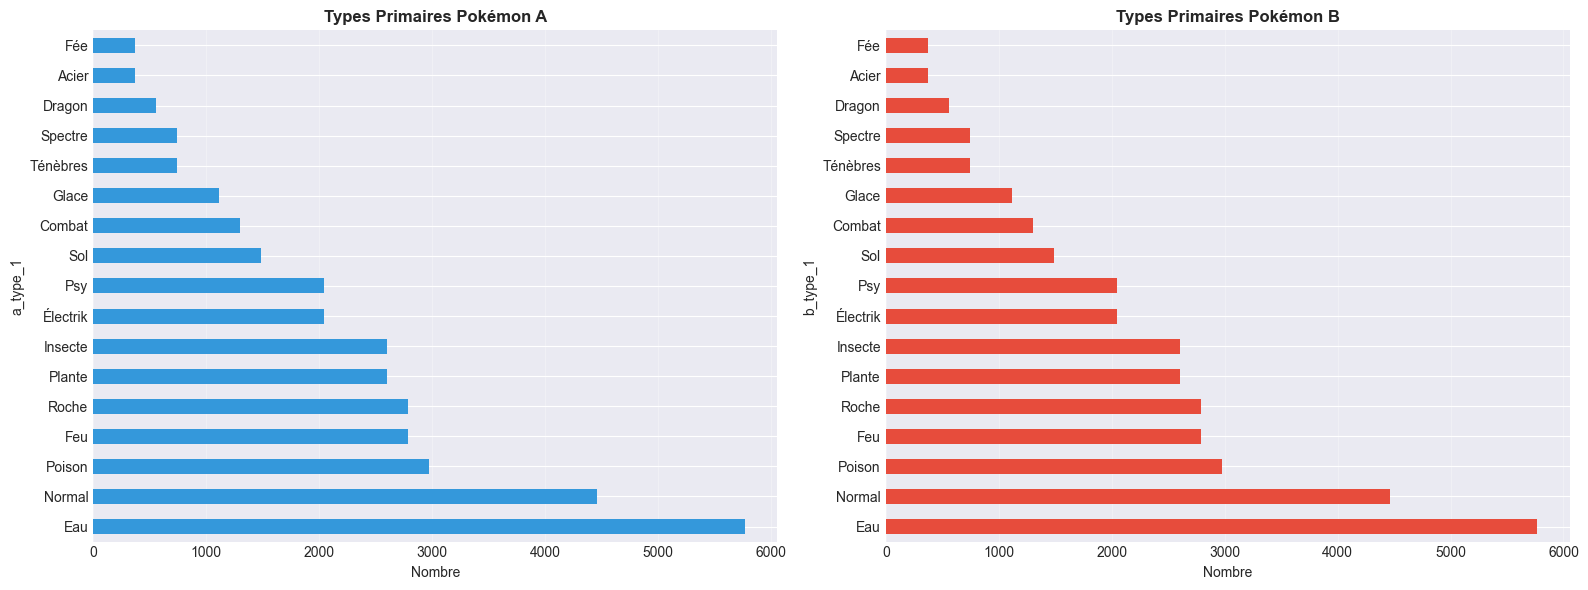

In [17]:
# Distribution des types primaires
print("=" * 80)
print("🔥 DISTRIBUTION DES TYPES PRIMAIRES")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Type 1 Pokémon A
type_a_counts = df_raw['a_type_1'].value_counts()
type_a_counts.plot(kind='barh', ax=axes[0], color='#3498db')
axes[0].set_title('Types Primaires Pokémon A', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Nombre')
axes[0].grid(axis='x', alpha=0.3)

# Type 1 Pokémon B
type_b_counts = df_raw['b_type_1'].value_counts()
type_b_counts.plot(kind='barh', ax=axes[1], color='#e74c3c')
axes[1].set_title('Types Primaires Pokémon B', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Nombre')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


🏆 TAUX DE VICTOIRE PAR TYPE PRIMAIRE (Pokémon A)
          Total Matchups  Wins (A)  Win Rate A
a_type_1                                      
Fée                  372       229       0.616
Acier                372       228       0.613
Feu                 2790      1688       0.605
Psy                 2046      1183       0.578
Combat              1302       752       0.578
Dragon               558       320       0.573
Plante              2604      1445       0.555
Eau                 5766      3135       0.544
Roche               2790      1482       0.531
Poison              2976      1487       0.500
Normal              4464      2127       0.476
Glace               1116       507       0.454
Électrik            2046       911       0.445
Spectre              744       271       0.364
Sol                 1488       537       0.361
Insecte             2604       897       0.344
Ténèbres             744       195       0.262


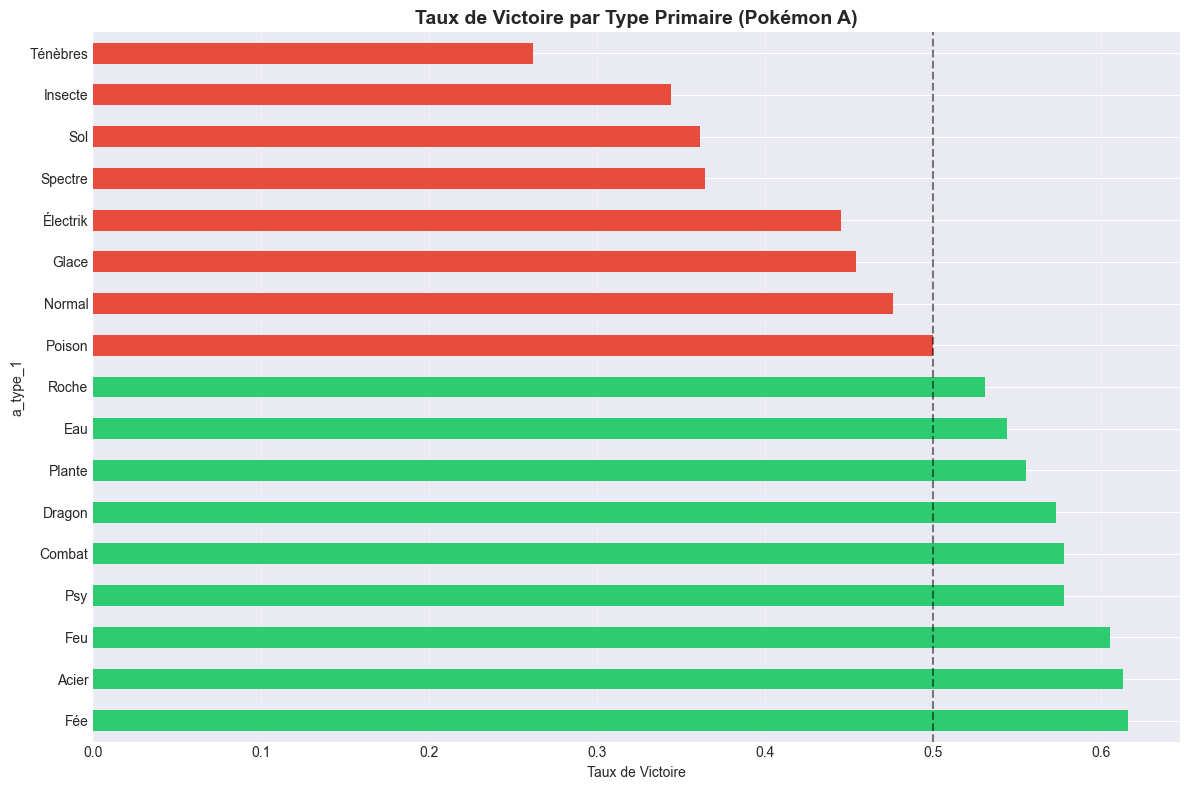

In [18]:
# Taux de victoire par type primaire du Pokémon A
print("\n" + "=" * 80)
print("🏆 TAUX DE VICTOIRE PAR TYPE PRIMAIRE (Pokémon A)")
print("=" * 80)

# winner=1 signifie A gagne, donc mean() = taux de victoire de A
win_rate_by_type_a = df_raw.groupby('a_type_1').agg({
    'winner': ['count', lambda x: (x == 1).sum(), 'mean']
}).round(3)
win_rate_by_type_a.columns = ['Total Matchups', 'Wins (A)', 'Win Rate A']
win_rate_by_type_a = win_rate_by_type_a.sort_values('Win Rate A', ascending=False)
print(win_rate_by_type_a)

# Visualisation
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#2ecc71' if wr > 0.5 else '#e74c3c' for wr in win_rate_by_type_a['Win Rate A']]
win_rate_by_type_a['Win Rate A'].plot(kind='barh', ax=ax, color=colors)
ax.axvline(x=0.5, color='black', linestyle='--', alpha=0.5)
ax.set_title('Taux de Victoire par Type Primaire (Pokémon A)', fontsize=14, fontweight='bold')
ax.set_xlabel('Taux de Victoire')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Analyse des Moves

In [19]:
# Analyse textuelle détaillée de la corrélation avec winner
print("=" * 80)
print("🎯 ANALYSE DÉTAILLÉE : CORRÉLATION AVEC winner")
print("=" * 80)

# Calculer la matrice de corrélation si pas encore fait
numeric_cols = [
    'a_hp', 'a_attack', 'a_defense', 'a_sp_attack', 'a_sp_defense', 'a_speed',
    'b_hp', 'b_attack', 'b_defense', 'b_sp_attack', 'b_sp_defense', 'b_speed',
    'a_move_power', 'a_move_priority', 'a_move_stab', 'a_move_type_mult',
    'b_move_power', 'b_move_priority', 'b_move_stab', 'b_move_type_mult',
    'speed_diff', 'hp_diff', 'a_total_stats', 'b_total_stats', 'a_moves_first',
    'winner'
]
numeric_cols = [col for col in numeric_cols if col in df_raw.columns]
corr_matrix = df_raw[numeric_cols].corr()

target_corr_sorted = corr_matrix['winner'].sort_values(ascending=False)

print("\n📈 TOP 15 FEATURES POSITIVEMENT CORRÉLÉES (favorisent A)")
print("-" * 80)
for i, (feature, corr) in enumerate(target_corr_sorted.head(16).items(), 1):
    if feature != 'winner':
        direction = "→ A gagne" if corr > 0 else "→ B gagne"
        strength = "FORTE" if abs(corr) > 0.3 else "MOYENNE" if abs(corr) > 0.1 else "FAIBLE"
        print(f"{i:2d}. {feature:30s} | Corr: {corr:7.4f} | {strength:7s} | {direction}")

print("\n📉 TOP 15 FEATURES NÉGATIVEMENT CORRÉLÉES (favorisent B)")
print("-" * 80)
for i, (feature, corr) in enumerate(target_corr_sorted.tail(15).items(), 1):
    direction = "→ B gagne" if corr < 0 else "→ A gagne"
    strength = "FORTE" if abs(corr) > 0.3 else "MOYENNE" if abs(corr) > 0.1 else "FAIBLE"
    print(f"{i:2d}. {feature:30s} | Corr: {corr:7.4f} | {strength:7s} | {direction}")

print("\n" + "=" * 80)
print("💡 INSIGHTS CLÉS")
print("=" * 80)
print(f"✅ Feature la plus importante: {target_corr_sorted.drop('winner').abs().idxmax()}")
print(f"   Corrélation: {target_corr_sorted.drop('winner').abs().max():.4f}")
print(f"\n✅ Nombre de features avec |corr| > 0.1: {(target_corr_sorted.drop('winner').abs() > 0.1).sum()}")
print(f"✅ Nombre de features avec |corr| > 0.2: {(target_corr_sorted.drop('winner').abs() > 0.2).sum()}")
print(f"✅ Nombre de features avec |corr| > 0.3: {(target_corr_sorted.drop('winner').abs() > 0.3).sum()}")

🎯 ANALYSE DÉTAILLÉE : CORRÉLATION AVEC winner

📈 TOP 15 FEATURES POSITIVEMENT CORRÉLÉES (favorisent A)
--------------------------------------------------------------------------------
 2. hp_diff                        | Corr:  0.5021 | FORTE   | → A gagne
 3. a_total_stats                  | Corr:  0.4625 | FORTE   | → A gagne
 4. a_attack                       | Corr:  0.3817 | FORTE   | → A gagne
 5. a_sp_defense                   | Corr:  0.3661 | FORTE   | → A gagne
 6. a_hp                           | Corr:  0.3561 | FORTE   | → A gagne
 7. a_defense                      | Corr:  0.3155 | FORTE   | → A gagne
 8. a_sp_attack                    | Corr:  0.2780 | MOYENNE | → A gagne
 9. a_move_type_mult               | Corr:  0.1631 | MOYENNE | → A gagne
10. speed_diff                     | Corr:  0.1545 | MOYENNE | → A gagne
11. a_move_power                   | Corr:  0.1391 | MOYENNE | → A gagne
12. a_speed                        | Corr:  0.1094 | MOYENNE | → A gagne
13. a_moves_f

⚔️ TOP 15 MOVES SÉLECTIONNÉS (Pokémon A)
a_move_name
Séisme          3102
Destruction     2191
Lance-Soleil    1919
Laser Glace     1888
Tonnerre        1866
Surf            1811
Psyko           1720
Tunnel          1484
Bomb-Beurk      1478
Déflagration    1211
Explosion       1206
Damoclès        1204
Casse-Brique    1028
Éboulement       999
Boutefeu         891
Name: count, dtype: int64


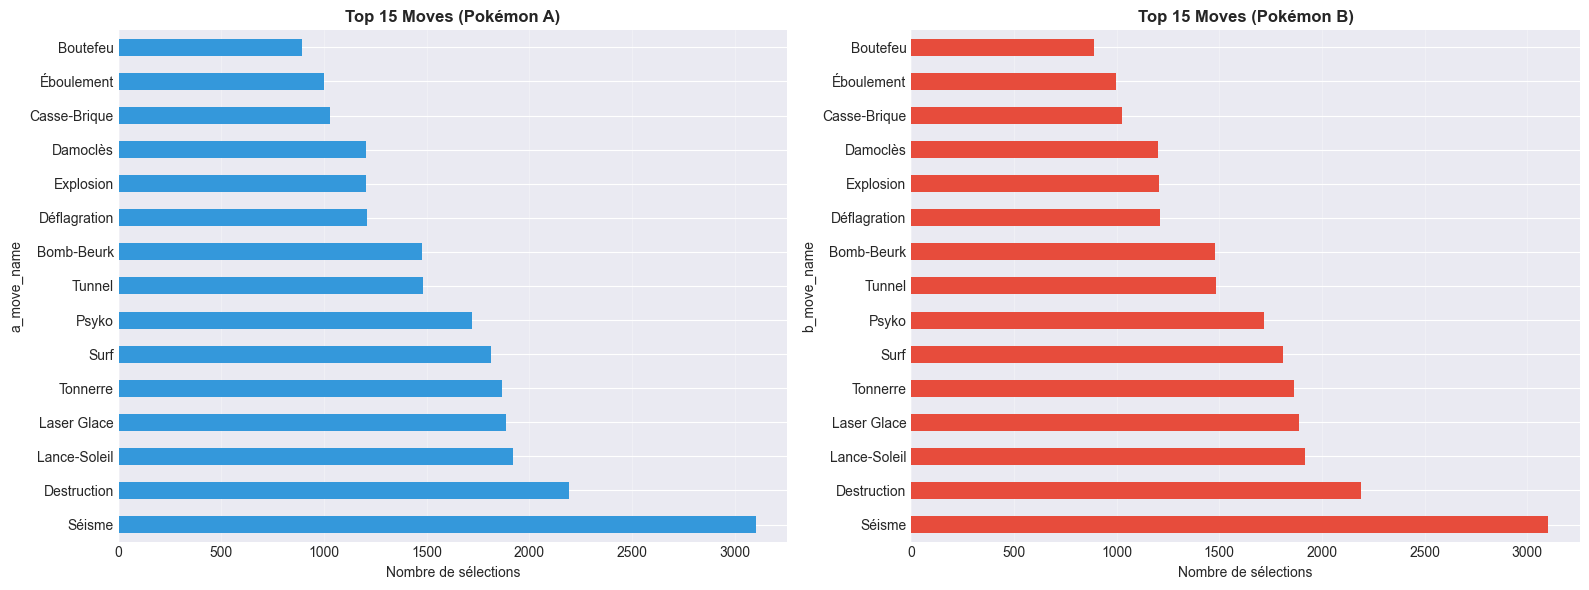

In [20]:
# Top moves utilisés par Pokémon A
print("=" * 80)
print("⚔️ TOP 15 MOVES SÉLECTIONNÉS (Pokémon A)")
print("=" * 80)
move_a_counts = df_raw['a_move_name'].value_counts().head(15)
print(move_a_counts)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

move_a_counts.plot(kind='barh', ax=axes[0], color='#3498db')
axes[0].set_title('Top 15 Moves (Pokémon A)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Nombre de sélections')
axes[0].grid(axis='x', alpha=0.3)

move_b_counts = df_raw['b_move_name'].value_counts().head(15)
move_b_counts.plot(kind='barh', ax=axes[1], color='#e74c3c')
axes[1].set_title('Top 15 Moves (Pokémon B)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Nombre de sélections')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


💥 DISTRIBUTION DES PUISSANCES DE MOVES


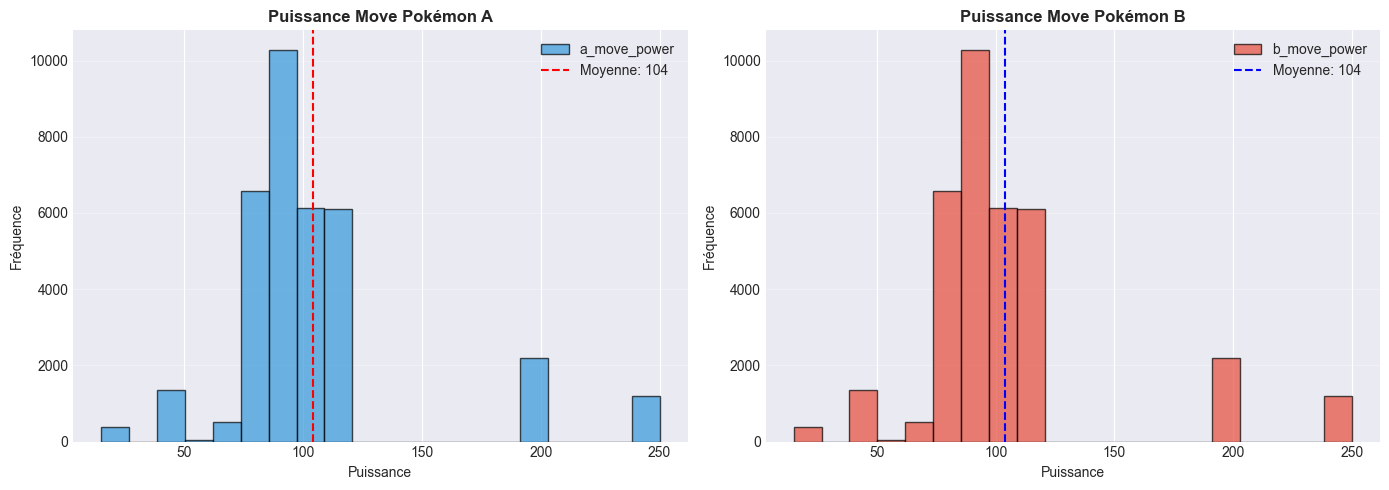

In [21]:
# Distribution des puissances de moves
print("\n" + "=" * 80)
print("💥 DISTRIBUTION DES PUISSANCES DE MOVES")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Move power A
df_raw['a_move_power'].plot(kind='hist', bins=20, ax=axes[0], color='#3498db', 
                             edgecolor='black', alpha=0.7)
axes[0].set_title('Puissance Move Pokémon A', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Puissance')
axes[0].set_ylabel('Fréquence')
axes[0].axvline(df_raw['a_move_power'].mean(), color='red', linestyle='--', label=f"Moyenne: {df_raw['a_move_power'].mean():.0f}")
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Move power B
df_raw['b_move_power'].plot(kind='hist', bins=20, ax=axes[1], color='#e74c3c', 
                             edgecolor='black', alpha=0.7)
axes[1].set_title('Puissance Move Pokémon B', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Puissance')
axes[1].set_ylabel('Fréquence')
axes[1].axvline(df_raw['b_move_power'].mean(), color='blue', linestyle='--', label=f"Moyenne: {df_raw['b_move_power'].mean():.0f}")
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


⚡ DISTRIBUTION DES PRIORITÉS DE MOVES

Priorités Pokémon A:
a_move_priority
0    33789
1      397
2      596
Name: count, dtype: int64

Priorités Pokémon B:
b_move_priority
0    33789
1      397
2      596
Name: count, dtype: int64


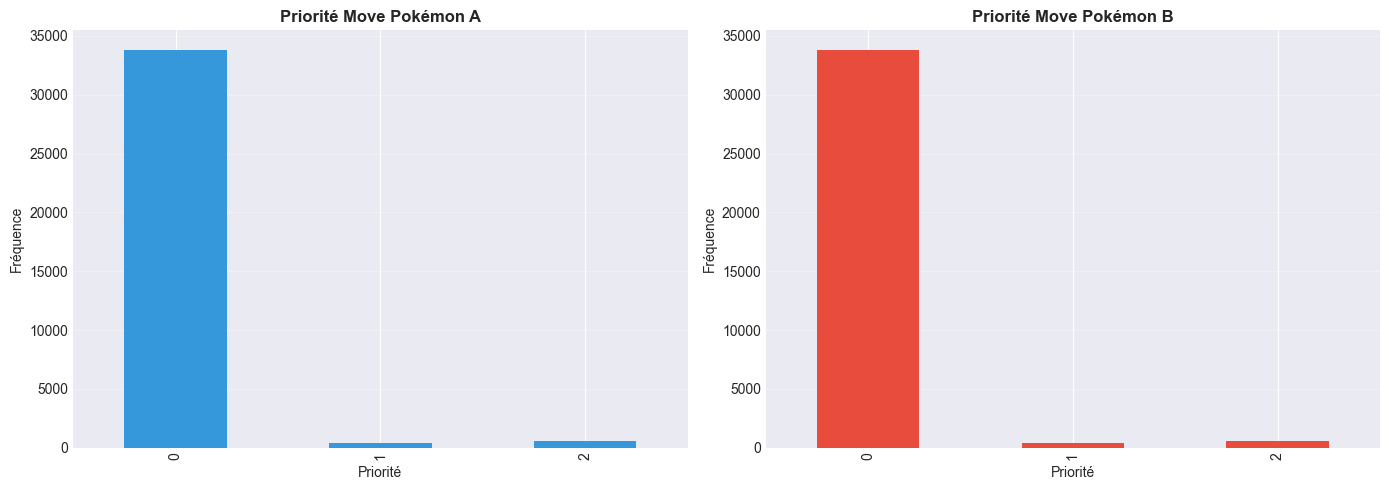

In [22]:
# Analyse des priorités
print("\n" + "=" * 80)
print("⚡ DISTRIBUTION DES PRIORITÉS DE MOVES")
print("=" * 80)

print("\nPriorités Pokémon A:")
print(df_raw['a_move_priority'].value_counts().sort_index())

print("\nPriorités Pokémon B:")
print(df_raw['b_move_priority'].value_counts().sort_index())

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_raw['a_move_priority'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='#3498db')
axes[0].set_title('Priorité Move Pokémon A', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Priorité')
axes[0].set_ylabel('Fréquence')
axes[0].grid(axis='y', alpha=0.3)

df_raw['b_move_priority'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='#e74c3c')
axes[1].set_title('Priorité Move Pokémon B', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Priorité')
axes[1].set_ylabel('Fréquence')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Corrélations

In [23]:
# Statistiques détaillées sur les features clés
print("=" * 80)
print("📊 STATISTIQUES DES FEATURES CLÉS")
print("=" * 80)

key_features = ['a_moves_first', 'speed_diff', 'a_move_type_mult', 'b_move_type_mult', 
                'a_total_stats', 'b_total_stats', 'a_move_power', 'b_move_power']

for feature in key_features:
    if feature in df_raw.columns:
        print(f"\n{feature}:")
        print(f"  Mean: {df_raw[feature].mean():.2f} | Std: {df_raw[feature].std():.2f}")
        print(f"  Min: {df_raw[feature].min():.2f} | Max: {df_raw[feature].max():.2f}")
        print(f"  Q1: {df_raw[feature].quantile(0.25):.2f} | Median: {df_raw[feature].median():.2f} | Q3: {df_raw[feature].quantile(0.75):.2f}")

print("\n" + "=" * 80)
print("🔍 ANALYSE DE a_moves_first (qui attaque en premier)")
print("=" * 80)
# winner=1 signifie A gagne, donc winner.mean() = taux de victoire de A
a_first_dist = df_raw.groupby('a_moves_first')['winner'].agg(['count', 'mean'])
a_first_dist.columns = ['Count', 'Win_Rate_A']
a_first_dist['Win_Rate_B'] = 1 - a_first_dist['Win_Rate_A']
print(a_first_dist)

print("\n💡 Interprétation:")
if 1 in a_first_dist.index:
    win_rate_when_first = a_first_dist.loc[1, 'Win_Rate_A']
    print(f"  → Quand A attaque en premier: A gagne {win_rate_when_first*100:.1f}% du temps")
if 0 in a_first_dist.index:
    win_rate_when_second = a_first_dist.loc[0, 'Win_Rate_A']
    print(f"  → Quand A attaque en second: A gagne {win_rate_when_second*100:.1f}% du temps")
    print(f"  → Avantage d'attaquer en premier: +{(win_rate_when_first - win_rate_when_second)*100:.1f}%")

📊 STATISTIQUES DES FEATURES CLÉS

a_moves_first:
  Mean: 0.52 | Std: 0.50
  Min: 0.00 | Max: 1.00
  Q1: 0.00 | Median: 1.00 | Q3: 1.00

speed_diff:
  Mean: 0.00 | Std: 42.62
  Min: -135.00 | Max: 135.00
  Q1: -30.00 | Median: 0.00 | Q3: 30.00

a_move_type_mult:
  Mean: 1.76 | Std: 0.84
  Min: 0.00 | Max: 4.00
  Q1: 1.00 | Median: 2.00 | Q3: 2.00

b_move_type_mult:
  Mean: 1.76 | Std: 0.84
  Min: 0.00 | Max: 4.00
  Q1: 1.00 | Median: 2.00 | Q3: 2.00

a_total_stats:
  Mean: 425.20 | Std: 113.58
  Min: 195.00 | Max: 780.00
  Q1: 323.00 | Median: 435.00 | Q3: 500.00

b_total_stats:
  Mean: 425.20 | Std: 113.58
  Min: 195.00 | Max: 780.00
  Q1: 323.00 | Median: 435.00 | Q3: 500.00

a_move_power:
  Mean: 103.96 | Std: 42.35
  Min: 15.00 | Max: 250.00
  Q1: 80.00 | Median: 90.00 | Q3: 110.00

b_move_power:
  Mean: 103.96 | Std: 42.35
  Min: 15.00 | Max: 250.00
  Q1: 80.00 | Median: 90.00 | Q3: 110.00

🔍 ANALYSE DE a_moves_first (qui attaque en premier)
               Count  Win_Rate_A  Win_Ra

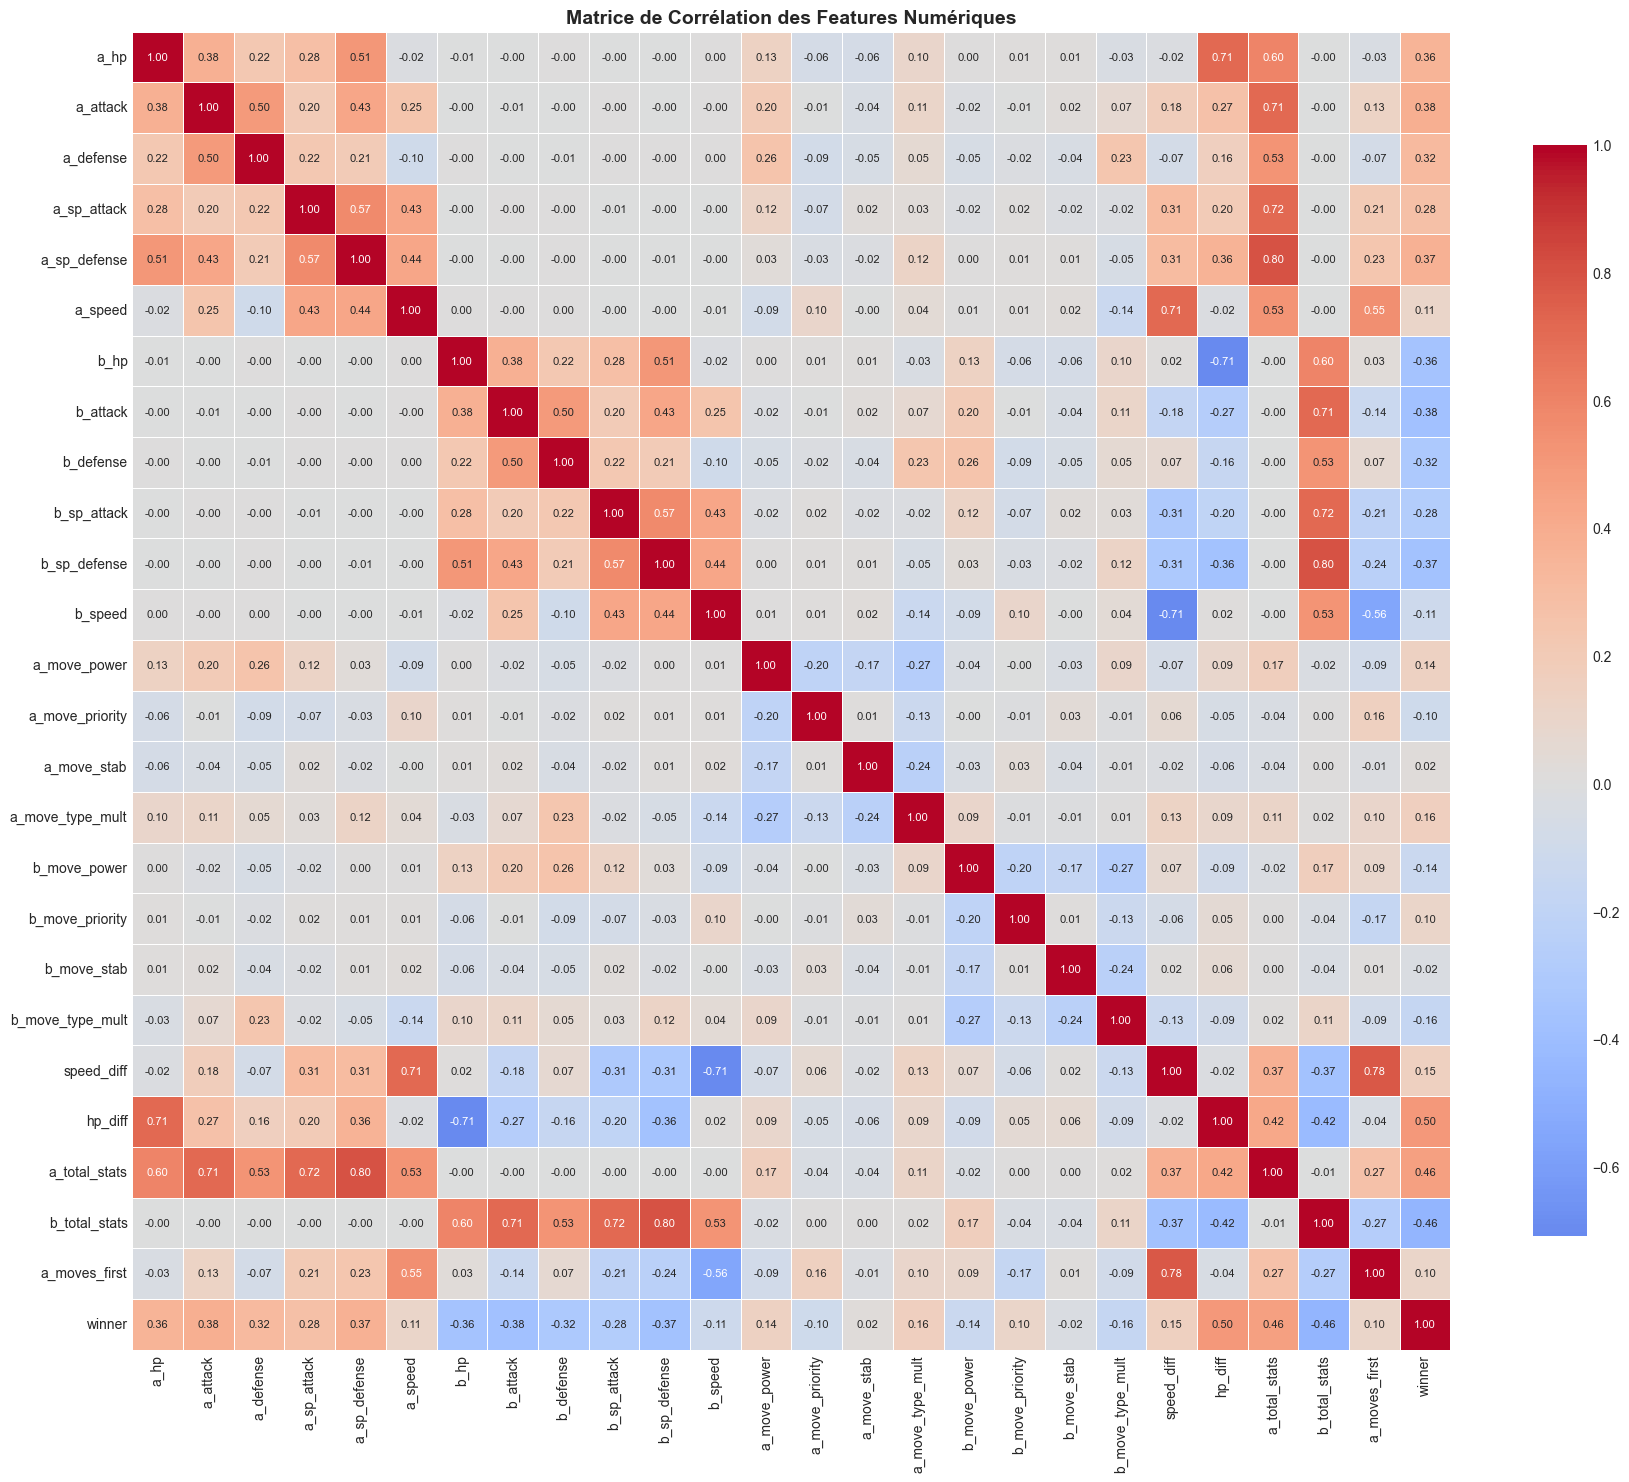

In [24]:
# Matrice de corrélation pour les features numériques
numeric_cols = [
    'a_hp', 'a_attack', 'a_defense', 'a_sp_attack', 'a_sp_defense', 'a_speed',
    'b_hp', 'b_attack', 'b_defense', 'b_sp_attack', 'b_sp_defense', 'b_speed',
    'a_move_power', 'a_move_priority', 'a_move_stab', 'a_move_type_mult',
    'b_move_power', 'b_move_priority', 'b_move_stab', 'b_move_type_mult',
    'speed_diff', 'hp_diff', 'a_total_stats', 'b_total_stats', 'a_moves_first',
    'winner'
]

# Sélectionner uniquement les colonnes existantes
numeric_cols = [col for col in numeric_cols if col in df_raw.columns]

corr_matrix = df_raw[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax,
            annot_kws={"size": 8})
ax.set_title('Matrice de Corrélation des Features Numériques', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Observations Principales

#### 1. **Équilibre des Classes**
- Le dataset présente un bon équilibre entre Pokémon A gagnant (winner=1) et Pokémon B gagnant (winner=0)
- Dataset multi-scénarios avec ~898k échantillons au total

#### 2. **Scénarios Disponibles**
- **best_move**: Scénario classique, B utilise son meilleur move (~34k échantillons)
- **random_move**: B choisit aléatoirement parmi ses moves (~174k échantillons)
- **all_combinations**: Toutes les combinaisons possibles de moves (~690k échantillons)
- Le modèle est entraîné sur tous les scénarios pour mieux généraliser

#### 3. **Features les Plus Corrélées au Gagnant**
- `a_moves_first`: Si A attaque en premier (vitesse ou priorité), il a plus de chances de gagner
- `speed_diff`: La différence de vitesse impacte directement qui attaque en premier
- `a_move_type_mult` / `b_move_type_mult`: L'avantage de type est crucial
- `a_total_stats` / `b_total_stats`: Les stats totales reflètent la puissance générale
- `effective_power_diff`: La différence de puissance effective (power × STAB × type_mult)

#### 4. **Impact de la Priorité**
- La plupart des moves ont priorité 0 (normal)
- Les moves prioritaires (+1, +2) sont rares mais peuvent renverser le combat

#### 5. **STAB et Type Effectiveness**
- Le STAB (Same Type Attack Bonus) donne un boost de x1.5
- Le multiplicateur de type (0.25x à 4x) peut complètement changer l'issue
- La combinaison STAB + super-efficace (x1.5 × x2 = x3) est dévastatrice

#### 6. **Qualité des Données**
- ✅ Aucune valeur manquante
- ✅ Types cohérents
- ✅ Distribution appropriée

---

### Recommandations pour la Suite

1. **Feature Engineering** (notebook 02):
   - Encoder les types (one-hot encoding)
   - Créer des ratios (stats A / stats B)
   - Features d'interaction (STAB × type_mult, effective_power)
   - Préserver scenario_type pour l'analyse mais l'exclure de l'entraînement

2. **Modélisation** (notebook 03):
   - Commencer par Random Forest (robuste, interprétable)
   - Tester XGBoost/LightGBM pour performances optimales
   - **Utiliser GridSearchCV** pour optimiser les hyperparamètres
   - Cross-validation stratifiée
   - Évaluer les performances par scénario

---

**✅ Dataset validé et prêt pour le feature engineering!**

## 9. Analyse des Features Dérivées

⚡ IMPACT DE speed_diff SUR LE GAGNANT


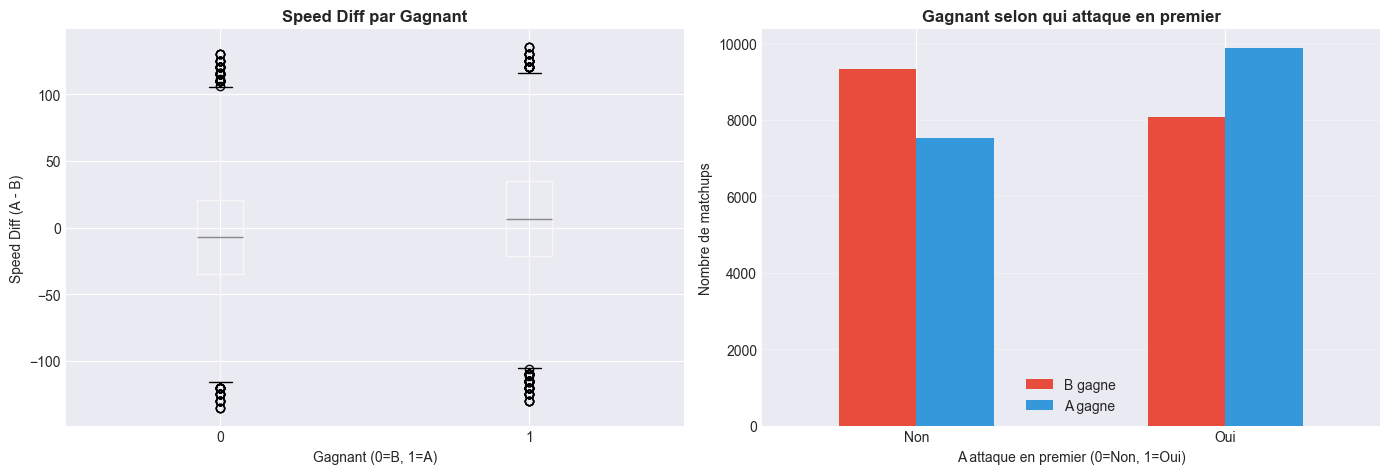

In [25]:
# Analyse de speed_diff et son impact sur le gagnant
print("=" * 80)
print("⚡ IMPACT DE speed_diff SUR LE GAGNANT")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot speed_diff par gagnant
df_raw.boxplot(column='speed_diff', by='winner', ax=axes[0])
axes[0].set_title('Speed Diff par Gagnant', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Gagnant (0=B, 1=A)')
axes[0].set_ylabel('Speed Diff (A - B)')
plt.suptitle('')  # Supprimer le titre auto

# Distribution de a_moves_first par gagnant
moves_first_win = df_raw.groupby(['a_moves_first', 'winner']).size().unstack(fill_value=0)
moves_first_win.plot(kind='bar', ax=axes[1], color=['#e74c3c', '#3498db'])
axes[1].set_title('Gagnant selon qui attaque en premier', fontsize=12, fontweight='bold')
axes[1].set_xlabel('A attaque en premier (0=Non, 1=Oui)')
axes[1].set_ylabel('Nombre de matchups')
axes[1].legend(['B gagne', 'A gagne'])
axes[1].set_xticklabels(['Non', 'Oui'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


🔥 IMPACT DU STAB ET TYPE MULTIPLIER


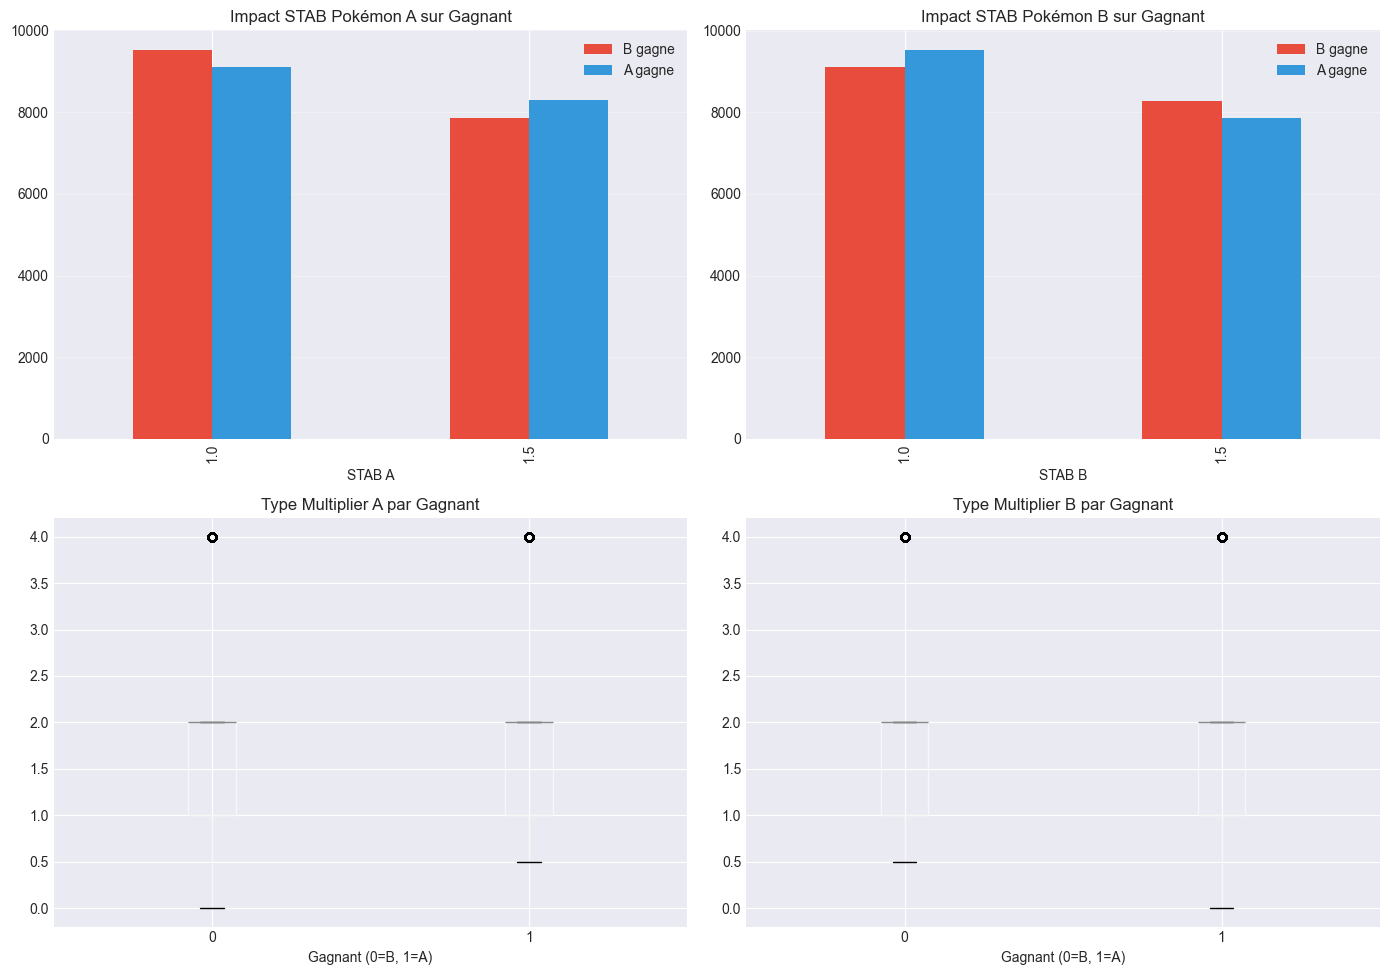

In [26]:
# Impact du STAB et type_multiplier
print("\n" + "=" * 80)
print("🔥 IMPACT DU STAB ET TYPE MULTIPLIER")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# STAB A par gagnant
stab_a_win = df_raw.groupby(['a_move_stab', 'winner']).size().unstack(fill_value=0)
stab_a_win.plot(kind='bar', ax=axes[0, 0], color=['#e74c3c', '#3498db'])
axes[0, 0].set_title('Impact STAB Pokémon A sur Gagnant', fontsize=12)
axes[0, 0].set_xlabel('STAB A')
axes[0, 0].legend(['B gagne', 'A gagne'])
axes[0, 0].grid(axis='y', alpha=0.3)

# STAB B par gagnant
stab_b_win = df_raw.groupby(['b_move_stab', 'winner']).size().unstack(fill_value=0)
stab_b_win.plot(kind='bar', ax=axes[0, 1], color=['#e74c3c', '#3498db'])
axes[0, 1].set_title('Impact STAB Pokémon B sur Gagnant', fontsize=12)
axes[0, 1].set_xlabel('STAB B')
axes[0, 1].legend(['B gagne', 'A gagne'])
axes[0, 1].grid(axis='y', alpha=0.3)

# Type mult A distribution par gagnant
df_raw.boxplot(column='a_move_type_mult', by='winner', ax=axes[1, 0])
axes[1, 0].set_title('Type Multiplier A par Gagnant', fontsize=12)
axes[1, 0].set_xlabel('Gagnant (0=B, 1=A)')
plt.suptitle('')

# Type mult B distribution par gagnant
df_raw.boxplot(column='b_move_type_mult', by='winner', ax=axes[1, 1])
axes[1, 1].set_title('Type Multiplier B par Gagnant', fontsize=12)
axes[1, 1].set_xlabel('Gagnant (0=B, 1=A)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [27]:
# Valeurs manquantes
print("=" * 80)
print("❓ ANALYSE DES VALEURS MANQUANTES")
print("=" * 80)

missing = df_raw.isnull().sum()
missing_pct = (missing / len(df_raw)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

if missing_df['Missing Count'].sum() == 0:
    print("\n✅ Aucune valeur manquante détectée!")
else:
    print(missing_df[missing_df['Missing Count'] > 0])
    print(f"\n⚠️ Total valeurs manquantes: {missing_df['Missing Count'].sum()}")

❓ ANALYSE DES VALEURS MANQUANTES

✅ Aucune valeur manquante détectée!


In [28]:
if 'scenario_type' in df_raw.columns:
    # Analyse textuelle détaillée par scénario
    print("\n" + "=" * 80)
    print("📊 ANALYSE APPROFONDIE PAR SCÉNARIO")
    print("=" * 80)
    
    for scenario in df_raw['scenario_type'].unique():
        scenario_data = df_raw[df_raw['scenario_type'] == scenario]
        
        print(f"\n{'='*80}")
        print(f"🎯 SCÉNARIO: {scenario.upper()}")
        print(f"{'='*80}")
        
        print(f"\n📈 Statistiques générales:")
        print(f"  Échantillons: {len(scenario_data):,}")
        print(f"  % du total: {len(scenario_data)/len(df_raw)*100:.1f}%")
        
        # Distribution du gagnant (corrigé: winner=0 → B gagne, winner=1 → A gagne)
        winner_dist = scenario_data['winner'].value_counts(normalize=True)
        print(f"\n⚖️  Distribution gagnant:")
        print(f"  A gagne (1): {winner_dist.get(1, 0)*100:.1f}%")
        print(f"  B gagne (0): {winner_dist.get(0, 0)*100:.1f}%")
        
        # Stats clés
        print(f"\n🔧 Moyennes des features clés:")
        print(f"  a_moves_first: {scenario_data['a_moves_first'].mean():.3f}")
        print(f"  speed_diff: {scenario_data['speed_diff'].mean():.1f}")
        print(f"  a_move_power: {scenario_data['a_move_power'].mean():.1f}")
        print(f"  b_move_power: {scenario_data['b_move_power'].mean():.1f}")
        print(f"  a_move_type_mult: {scenario_data['a_move_type_mult'].mean():.3f}")
        print(f"  b_move_type_mult: {scenario_data['b_move_type_mult'].mean():.3f}")
        
        # Corrélations (sélectionner uniquement les colonnes numériques)
        numeric_scenario_data = scenario_data.select_dtypes(include=[np.number])
        corr_with_winner = numeric_scenario_data.corr()['winner'].sort_values(ascending=False)
        print(f"\n🎯 Top 5 corrélations avec winner:")
        for i, (feat, corr) in enumerate(corr_with_winner.head(6).items(), 1):
            if feat != 'winner':
                print(f"  {i}. {feat:25s}: {corr:7.4f}")
    
    print("\n" + "=" * 80)
else:
    print("⚠️ Colonne scenario_type non trouvée - analyse par scénario non applicable")


📊 ANALYSE APPROFONDIE PAR SCÉNARIO

🎯 SCÉNARIO: BEST_MOVE

📈 Statistiques générales:
  Échantillons: 34,782
  % du total: 100.0%

⚖️  Distribution gagnant:
  A gagne (1): 50.0%
  B gagne (0): 50.0%

🔧 Moyennes des features clés:
  a_moves_first: 0.515
  speed_diff: 0.0
  a_move_power: 104.0
  b_move_power: 104.0
  a_move_type_mult: 1.763
  b_move_type_mult: 1.763

🎯 Top 5 corrélations avec winner:
  2. hp_diff                  :  0.5021
  3. a_total_stats            :  0.4625
  4. a_attack                 :  0.3817
  5. a_sp_defense             :  0.3661
  6. a_hp                     :  0.3561



## 10. Conclusions

### Observations Principales

#### 1. **Équilibre des Classes**
- Le dataset présente un excellent équilibre (~50/50) entre Pokémon A gagnant (winner=1) et Pokémon B gagnant (winner=0)
- Cet équilibre est naturel car tous les matchups sont symétriques (A vs B = B vs A inversé)

#### 2. **Features les Plus Corrélées au Gagnant**
- `a_moves_first`: Si A attaque en premier (vitesse ou priorité), il a plus de chances de gagner
- `speed_diff`: La différence de vitesse impacte directement qui attaque en premier
- `a_move_type_mult` / `b_move_type_mult`: L'avantage de type est crucial
- `a_total_stats` / `b_total_stats`: Les stats totales reflètent la puissance générale

#### 3. **Impact de la Priorité**
- La plupart des moves ont priorité 0 (normal)
- Les moves prioritaires (+1, +2) sont rares mais peuvent renverser le combat

#### 4. **STAB et Type Effectiveness**
- Le STAB (Same Type Attack Bonus) donne un boost de x1.5
- Le multiplicateur de type (0.25x à 4x) peut complètement changer l'issue

#### 5. **Qualité des Données**
- ✅ Aucune valeur manquante
- ✅ Types cohérents
- ✅ Distribution équilibrée

---

### Recommandations pour la Suite

1. **Feature Engineering** (notebook 02):
   - Encoder les types (one-hot ou embeddings)
   - Créer des ratios (stats A / stats B)
   - Features d'interaction (STAB × type_mult)

2. **Modélisation** (notebook 03):
   - Commencer par Random Forest (robuste, interprétable)
   - Tester XGBoost/LightGBM pour performances
   - Cross-validation stratifiée

---

**✅ Dataset validé et prêt pour le feature engineering!**